## TP3: Visión por Computadora I (CEIA)
### Nombre: Pablo Segovia

In [2]:
# Importamos las librerías
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en 
Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

Nota: Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza
de la detección.

1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos

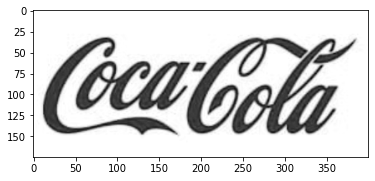

In [3]:
# Detección de logos
# Se debe hacer un detector usando el template
template = cv.imread('template\pattern.png',0)
w, h = template.shape[::-1]
plt.figure()
plt.imshow(template, cmap='gray')
plt.show()

In [4]:
# Obtenemos los archivos de imagen
# Directorio actual
directorio_actual = os.getcwd()

# Listar archivos en el directorio actual
archivos_directorio_actual = os.listdir(directorio_actual)
print("Archivos en el directorio actual:", archivos_directorio_actual)

# Acceder a un subdirectorio dentro del directorio actual
nombre_subdirectorio = "images"
ruta_subdirectorio = os.path.join(directorio_actual, nombre_subdirectorio)

# Listar archivos en el directorio de imagenes
archivos_imagen = os.listdir(ruta_subdirectorio)
print("Archivos en el directorio actual:", archivos_imagen)

Archivos en el directorio actual: ['images', 'template', 'TP3_PabloSegovia.ipynb']
Archivos en el directorio actual: ['COCA-COLA-LOGO.jpg', 'coca_logo_1.png', 'coca_logo_2.png', 'coca_multi.png', 'coca_retro_1.png', 'coca_retro_2.png', 'logo_1.png']


In [12]:
# Vemos cuales son las imagenes para mostrar
for img in archivos_imagen:
    img = cv.imread(f'images\{img}', 0)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(img_rgb)
    plt.show()

error: OpenCV(3.4.2) c:\miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<3,4,-1>,struct cv::Set<0,2,5>,2>::CvtHelper'


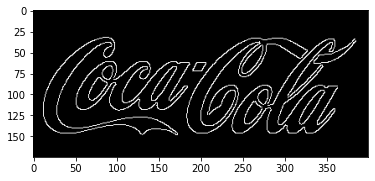

In [9]:
# Obtenemos el template en bordes con Canny
template_bordes = cv.Canny(template, threshold1=100, threshold2=255)
plt.figure()
plt.imshow(template_bordes, cmap='gray')
plt.show()

2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen
coca_multi.png con el mismo témplate del ítem 1

3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.